In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import TimeSeriesSplit
from sklearn import svm
from sklearn.preprocessing import Normalizer
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import Ridge

from LSSVMRegression import LSSVMRegression

from windTransformer import WindVectorTransformer
from windTransformer import WindDegreeTransformer
from windData import WindDataCollector

import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import math
import pandas as pd

from influxdb import InfluxDBClient # install via "pip install influxdb"

import datetime

In [ ]:
def eval_metrics(actual, pred):
	rmse = np.sqrt(mean_squared_error(actual, pred))
	mae = mean_absolute_error(actual, pred)
	r2 = r2_score(actual, pred)
	return rmse, mae, r2


## Data prep

In [ ]:
start_time = datetime.datetime(2021, 1, 1, 0, 0, 0).strftime("'%Y-%m-%dT%H:%M:%SZ'")


dataCollector = WindDataCollector()

gen_df = dataCollector.getGenerationData(now = start_time, delta="90")
wind_df = dataCollector.getWindData(now = start_time, delta="90")

gen_df_alligned = pd.merge_asof(wind_df,gen_df,left_index=True, right_index=True)

In [ ]:
train_length = int(len(gen_df_alligned)*0.9)

train_X = gen_df_alligned.iloc[:train_length][[
#    "Direction",
    "Speed"]]
test_X = gen_df_alligned.iloc[train_length:][[
#    "Direction",
    "Speed"]]

train_y = gen_df_alligned.iloc[:train_length]["Total"]
test_y = gen_df_alligned.iloc[train_length:]["Total"]

In [ ]:
import plotly.express as px


fig = px.scatter(gen_df_alligned, x="Speed", y="Total")
fig.show()

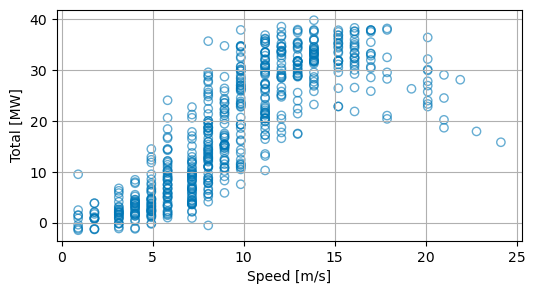

In [32]:
plt.figure(figsize=(6,3))
plt.scatter(x = gen_df_alligned['Speed'], y = gen_df_alligned['Total'], facecolors='none', edgecolors='#0077b6', alpha = 0.6)
plt.xlabel('Speed [m/s]')
plt.ylabel('Total [MW]')
#plt.title("Scatterplot of dataset")
plt.grid(True)
plt.savefig("./plots/data_scatterplot.pdf", bbox_inches='tight')
plt.show()